In [22]:
#using VADER to calculate sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from string import punctuation
from sklearn.metrics import mean_squared_error
from math import sqrt


In [12]:
#loading data
headlines = pd.read_csv('FiQA_train_ABSA_financial_headlines.tsv',delimiter='\t',header=0)
posts = pd.read_csv('FiQA_train_ABSA_financial_posts.tsv',delimiter='\t',header=0)
posts = posts.drop(['Unnamed: 0', 'id'],axis=1)
headlines = headlines.drop(['Unnamed: 0', 'id'],axis=1)
posts_text = posts.iloc[:,:1]
posts_score = posts.iloc[:,1:]
headlines_text = headlines.iloc[:,:1]
headlines_score = headlines.iloc[:,1:]
text_frames = [posts_text,headlines_text]
score_frames = [posts_score,headlines_score]
text = pd.concat(text_frames)
score = pd.concat(score_frames)

In [13]:
sentences = []
intensity = []
for sent in text.values.tolist():
    sentences.append(sent[0])
for scr in score.values.tolist():
    intensity.append(scr[0])

In [14]:
# turn a sentence into clean tokens
def clean_sentence(sentence):
    #remove multiple repeat non num-aplha char !!!!!!!!!-->!
    sentence = re.sub(r'(\W)\1{2,}', r'\1', sentence) 
    #removes alpha char repeating more than twice aaaa->aa
    sentence = re.sub(r'(\w)\1{2,}', r'\1\1', sentence)
    #removes links
    sentence = re.sub(r'(?P<url>https?://[^\s]+)', r'', sentence)
    # remove @usernames
    sentence = re.sub(r"(?:\@|https?\://)\S+", "", sentence)
    #removing stock names to see if it helps
    sentence = re.sub(r"(?:\$|https?\://)\S+", "", sentence)
    #remove # from #tags
    sentence = sentence.replace('#','')
    # split into tokens by white space
    tokens = sentence.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
#     tokens = [word for word in tokens if word.isalpha()]
#no removing non alpha words to keep stock names($ZSL)
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    tokens = ' '.join(tokens)
    return tokens

In [15]:
for i in range(len(sentences)):
    sentences[i] = clean_sentence(sentences[i])
sentences

['looking weak could good short setup',
 'Looking test 925 resistance point cc cfrazierjr traders',
 'prerelease shtty earnings something',
 'ContrarianAlert Why Zynga Failed',
 'shorts getting nervous',
 'times start wonder enough shares beast keeps moving',
 'points two Facebook games accuses copyright infringement',
 'Following mornings EPS blew added longs',
 'No worries always said thered sucker rallies trend congrats',
 'One thing cant short food Its barely getting warm chicago looks like drought conditions soil already',
 'getting readyTarget plus close better avg daily Volume',
 'OPPY reduces price target Yum Brands YUM factoring troubles company seeing China',
 'Chinese ADRs heading higher watchlist',
 'high volume blast Friday goes higher',
 'price stocks times lower annual earnings could resist buying everyone selling',
 'Hit With Lawsuit Russian Search Engine',
 'Long setup Closed 20MA MACD cross November catalyst',
 'In response thoughts Nikesh dont think right fit visiona

In [16]:
analyser = SentimentIntensityAnalyzer()

In [17]:
prediction=[]
for sent in sentences:
    prediction.append(analyser.polarity_scores(sent)['compound'])
    

In [18]:
len(intensity)

3789

In [21]:
len(prediction)

3789

In [18]:
trmse = sqrt(mean_squared_error(score_trainY, train_predicted_score))

mean of error  17.489635787806854
max 77.24
min 0.0


Populating the interactive namespace from numpy and matplotlib


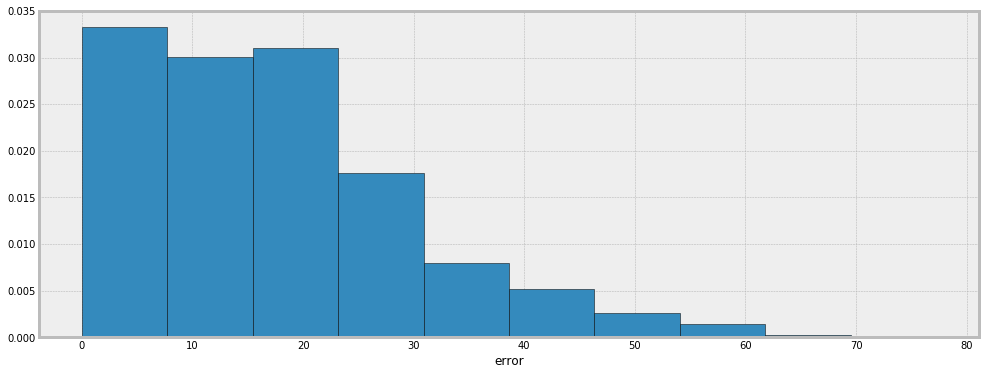

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%pylab inline
plt.style.use('bmh')
pylab.rcParams['figure.figsize'] = (15, 6)
plt.hist(error, normed=True,edgecolor='black')
plt.xlabel('error');